<center><h1>Project XII</h1><h2>Machine learning business OilyGiant mining company</h2></center>

<b><u>Description:</u></b>

As an analyst at the "OilyGiant" mining company , you been ask to find the bes place for a new well:

for that you made a plan with this steps:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves


- Build a model for predicting the volume of reserves in the new wells


- Pick the oil wells with the highest estimated values


- Pick the region with the highest total profit for the selected oil wells


- You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique

<hr><b><u>Index Menu:</u></b>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <b style="font-size: 17px;" id="index">index:</b> 
<br><br>  
<a href="#Step I">Step I - Download and prepare the data. Explain the procedure</a>
<br><br>     
<a href="#Step II">Step II - Train and test the model for each region</a>
<br> <br>    
<a href="#Step III">Step III - Prepare for profit calc</a>
<br><br> 
<a href="#Step IV">Step IV - Write a function to calculate profit from a set of selected oil wells and model predictions</a>
<br><br> 
<a href="#Step V">Step V - Calculate risks and profit for each region</a>
<br><br> 
<a href="#general_conclusion">General conclusion</a>   
</div>

<hr><div id="Step I"><h2>Step I - Download and prepare the data. Explain the procedure</h2><br><i>Loading all the libraries: pandas,numpy,matplotlib,etc</i></div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np
import re

# seaborn for visualization
import seaborn as sns
sns.set_style("darkgrid")

# matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import scipy modules
from scipy import stats as st

# import joblib modules
from joblib import dump

# import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error

# import warnings and display html
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html
from itertools import chain,cycle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_rows', None)

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


<hr><i>Loading Dataset</i>

In [2]:
# read the data
try:
    rone = pd.read_csv('/datasets/geo_data_0.csv')
    rtwo = pd.read_csv('/datasets/geo_data_1.csv')
    rthree = pd.read_csv('/datasets/geo_data_2.csv')
    
except:
    rone = pd.read_csv('geo_data_0.csv')
    rtwo = pd.read_csv('geo_data_1.csv')
    rthree = pd.read_csv('geo_data_2.csv')     
    
print('Data has been read correctly!')

Data has been read correctly!


<hr><i>Data Describe:<i>

In [3]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4))  # check this out
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()
    print('data Charts')
    ax = sns.pairplot(df)
    ax.fig.suptitle('Relationship between parameters for geological data', y=1.02)
    plt.figure(figsize=(8,6))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title('Correlation matrix')
    plt.show();
    print()

information about Our "geo data 0" dataset:



,type,count,na,na%
id,object,100000,0,0.0
f0,float64,100000,0,0.0
f1,float64,100000,0,0.0
f2,float64,100000,0,0.0
product,float64,100000,0,0.0



Head:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Tail:


,id,f0,f1,f2,product
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



Describe include: all :



,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,TtcGQ,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089



nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

id 0
f0 0
f1 0
f2 0
product 1


None


Shape: (100000, 5)


Duplicated: We have 0 duplicated rows


Dtypes:


id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


data Charts


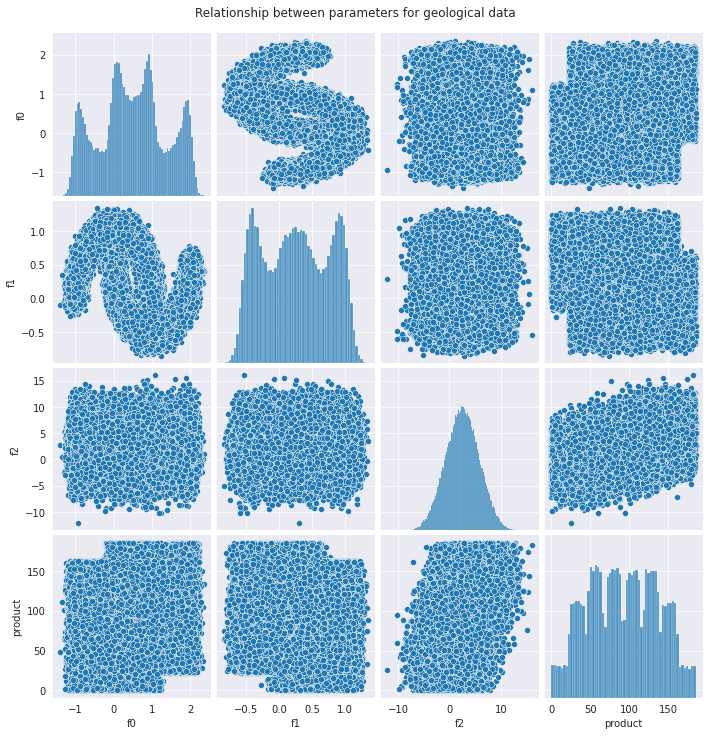

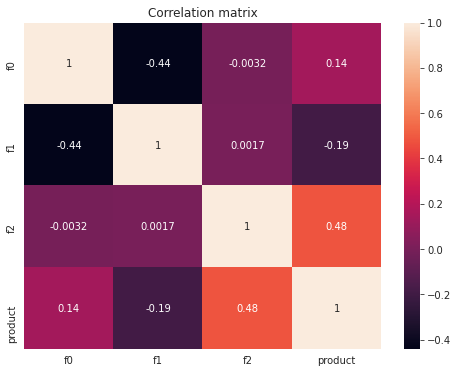



information about Our "geo data 1" dataset:



,type,count,na,na%
id,object,100000,0,0.0
f0,float64,100000,0,0.0
f1,float64,100000,0,0.0
f2,float64,100000,0,0.0
product,float64,100000,0,0.0



Head:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Tail:


,id,f0,f1,f2,product
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364
99999,relB0,-3.426139,-7.794274,-0.003299,3.179103



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



Describe include: all :



,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,5ltQ6,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044



nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

id 0
f0 0
f1 0
f2 0
product 8235


None


Shape: (100000, 5)


Duplicated: We have 0 duplicated rows


Dtypes:


id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


data Charts


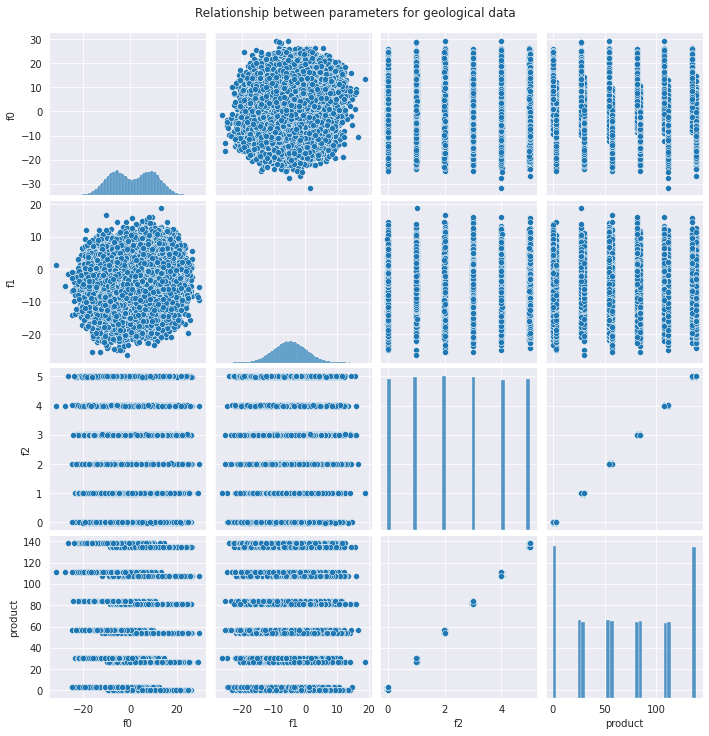

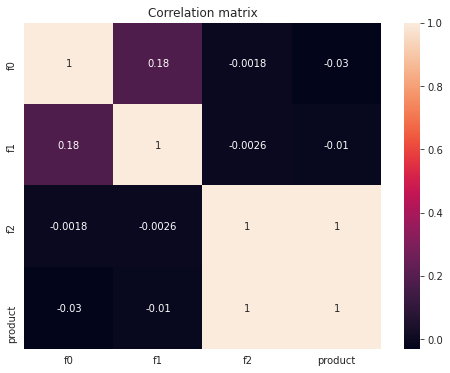



information about Our "geo data 2" dataset:



,type,count,na,na%
id,object,100000,0,0.0
f0,float64,100000,0,0.0
f1,float64,100000,0,0.0
f2,float64,100000,0,0.0
product,float64,100000,0,0.0



Head:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Tail:


,id,f0,f1,f2,product
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253
99999,V9kWn,-2.551421,-2.025625,6.090891,102.775767



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838



Describe include: all :



,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,Vcm5J,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027



nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

id 0
f0 0
f1 0
f2 0
product 1


None


Shape: (100000, 5)


Duplicated: We have 0 duplicated rows


Dtypes:


id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


data Charts


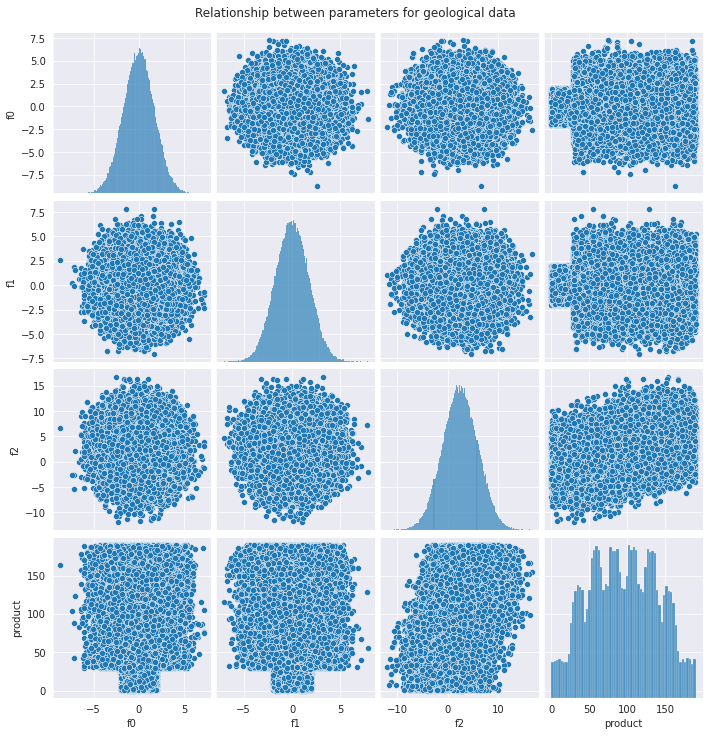

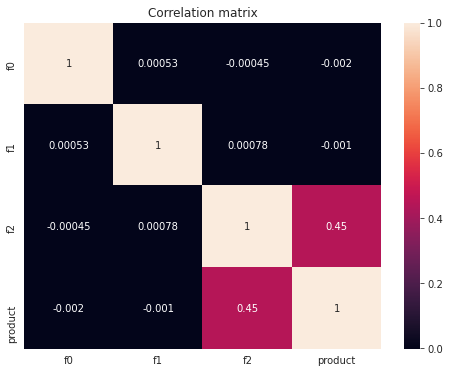

In [4]:
#print our info data
print('information about Our "geo data 0" dataset:')
general_info(rone)
print()
print('information about Our "geo data 1" dataset:')
general_info(rtwo)
print()
print('information about Our "geo data 2" dataset:')
general_info(rthree)

<hr><b style="font-size: 17px;">Geological exploration data for the three regions are stored in files:</b>

<b style="font-size: 14px;">Three geo data sets :</b> rone(AKA geo_data_0) , rtwo(AKA geo_data_1) , rthree(AKA geo_data_2)</b>

<b style="font-size: 14px;">Number of `rows` in each one: 100k</b>

 - `id` - data string index 
 
 
 - `CustomerId` - unique oil well identifier 
 
 
 - `f0`,`f1`,`f2` - three features of points (their specific meaning is unimportant, but the features themselves are significant)
 
  
 - `product` - volume of reserves in the oil well (thousand barrels)
 
 
<b><u>Conditions:</u></b>

- Only linear regression is suitable for model training (the rest are not sufficiently predictable)


- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation


- The budget for development of 200 oil wells is 100 USD million


- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels)


- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected


- The data is synthetic: contract details and well characteristics are not disclosed


<b><u>Missing Values:</u></b>

Doesn't contain any missing values 


<b><u>Duplicated:</u></b>

Doesn't contain any duplicates


<b><u>All so we found that:</u></b>

- `rone(AKA geo_data_0)`, f2 is normally distributed and has a high correlation of 0.48 to the `product`


- `rtwo(AKA geo_data_1)`, f2 is linearly correlated with `product`


- `rthree(AKA geo_data_2)`, f1, f2, and f3 are all normally distributed. Also f2 has a high correlation of 0.45 to the `product`

<hr><div id="Step II"><h2>II - Train and test the model for each region:</h2></div>

What we going to do in this step:

- Split the data into a training set & validation set with ratio of 75:25


- Train the model and make prediction for the validation set


- Save the predictions and correct answers for the validation set


- Print the avg vol of predicted reserves and model RMSE

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

In [5]:
#Split function that ratio our data as 75:25
def spliter(df):
    features = df.drop(columns=['product', 'id'])
    target =  df["product"]
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)
    print("features_train:",len(features_train),"\ntarget_train:",len(target_train),"\nfeatures_test:",len(features_test),"\ntarget_test:",len(target_test))
    return features_train, features_test, target_train, target_test

#fn take test & train data, normalize and fit into linear regression (output as R2,RMSE & avg score)
def LinearReg(features_train, features_test, target_train, target_test):
    to_normalize = ['f0','f1','f2']
    scaler = StandardScaler()
    scaler.fit(features_train[to_normalize])
    features_train.loc[:,to_normalize] = scaler.transform(features_train[to_normalize])
    features_test.loc[:,to_normalize] = scaler.transform(features_test[to_normalize])
    lr = LinearRegression().fit(features_train,target_train)
    predicted_values = lr.predict(features_test)
    print('R2', lr.score(features_test, target_test))
    print('RMSE:', np.sqrt(mean_squared_error(target_test, predicted_values)))
    print('Avg volume:',predicted_values.mean())
    return predicted_values

In [6]:
print()
print("\033[1m" + 'Region I' + "\033[0m")
print()
print("\033[4m75:25\033[0m")
features_train0, features_test0, target_train0, target_test0 = spliter(rone)
print()
print("\033[4mprediction\033[0m")
predicted_values0 = LinearReg(features_train0, features_test0, target_train0, target_test0)
print()
print("\033[1m" + 'Region II' + "\033[0m")
print()
print("\033[4m75:25\033[0m")
features_train1, features_test1, target_train1, target_test1 = spliter(rtwo)
print()
print("\033[4mprediction\033[0m")
predicted_values1 = LinearReg(features_train1, features_test1, target_train1, target_test1)
print()
print("\033[1m" + 'Region III' + "\033[0m")
print()
print("\033[4m75:25\033[0m")
features_train2, features_test2, target_train2, target_test2 = spliter(rthree)
print()
print("\033[4mprediction\033[0m")
predicted_values2 = LinearReg(features_train2, features_test2, target_train2, target_test2)


Region I

75:25
features_train: 75000 
target_train: 75000 
features_test: 25000 
target_test: 25000

prediction
R2 0.27994321524487786
RMSE: 37.5794217150813
Avg volume: 92.59256778438035

Region II

75:25
features_train: 75000 
target_train: 75000 
features_test: 25000 
target_test: 25000

prediction
R2 0.9996233978805127
RMSE: 0.893099286775617
Avg volume: 68.728546895446

Region III

75:25
features_train: 75000 
target_train: 75000 
features_test: 25000 
target_test: 25000

prediction
R2 0.20524758386040443
RMSE: 40.02970873393434
Avg volume: 94.96504596800489


<h3>5.Analyze the results</h3>

Our coefficient of determination the "R2" metric (AKA R-squared) divides the Model MSE by the Mean MSE and then subtracts the obtained value from one

If the metric increases, the models quality also improves, The first & third regions have a slightly lower R-squared metric, with 0.28 and 0.21 respectively Similarly, the RMSE is related to the "R2" so the results reflect that

Avg value predicted is:

- region I is 93

- region II is 69

- region III is 95

This means that I & III regions should be preferred, with exclamation mark that the models also make more errors in those regions

<hr><div id="Step III"><h2>III - Prepare for profit calc:</h2></div>


<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

<h3>1.Store all key values for calculations in separate variables</h3>

For now , any key value & variable have been suitably saved

<h3>2.Calculate the volume of reserves sufficient for developing a new well without losses, Compare the obtained value with the average volume of reserves in each region</h3>

Our following conditions: 

- Only linear regression is suitable for model training (the rest are not sufficiently predictable)


- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calc


- The budget for development of 200 oil wells is 100 million Usd


- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (vol of reserves is in thousand barrels)


- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected

In [7]:
N = 500 
N_best = 200
N_wells = 200
Bud = 100 * 10**6
Price = 4.5
Unit = 1000
Risk = 0.025
volume_of_res = Bud/N_best/(Price*Unit) 

print('The vol of reserves required to develop a new well without loss: %.2f' % volume_of_res)

The vol of reserves required to develop a new well without loss: 111.11


<h3>3.Provide the findings about the preparation for profit calculation step</h3>

Since all our calculation based on the worst case scenario , our estimate is on the safe investment, And we have two regions that pretty much have close value so this is very good news for us

<hr><div id="Step IV"><h2>IV - Write a function to calculate profit from a set of selected oil wells and model predictions:</h2></div>


<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

In [8]:
#This function calc the profit generated based on the volume of oil in a particular region
def profit(target, probabilities):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:N_best]
    return (selected.sum()* (Price*Unit)) - Bud

In [9]:
print("Region I profit =", profit(target_test0, predicted_values0))
print("Region II profit =", profit(target_test1, predicted_values1))
print("Region III profit =", profit(target_test2, predicted_values2))

Region I profit = 33208260.43139851
Region II profit = 24150866.966815114
Region III profit = 27103499.635998324


Our fn calc the profit from the best 200 wells based on prediction model 

<h3>1.Pick the wells with the highest values of predictions</h3>

In [10]:
#Argruments profit calc fn in additon to the num of outputs needed , output is the wells with the highest prediction
def high(target, probabilities,number):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:N_best]
    return selected.head(number)

In [11]:
print("\033[4mRegion I highest values:\033[0m")
print(high(target_test0, predicted_values0, 5))
print()
print("\033[4mRegion II highest values:\033[0m")
print(high(target_test1, predicted_values1, 5))
print()
print("\033[4mRegion III highest values:\033[0m")
print(high(target_test2, predicted_values2, 5))

Region I highest values:
9317     162.810993
219      153.639837
10015    162.153488
11584     96.893581
23388    178.879516
Name: product, dtype: float64

Region II highest values:
20430    137.945408
7777     137.945408
8755     137.945408
1178     137.945408
4285     137.945408
Name: product, dtype: float64

Region III highest values:
22636    175.103291
24690    131.627481
7811     141.160070
1581     159.676082
6751     142.135203
Name: product, dtype: float64


<h3>2.Summarize the target volume of reserves in accordance with these predictions</h3>

Wells with highest values for each region, Show similarity of values in region II which gives us a clue about why the "R2" was so high earlier

<h3>3.Provide findings: suggest a region for oil wells' development and justify the choice, Calculate the profit for the obtained volume of reserves</h3>


Our region I , Give us a predicted profit of 33,208,260.43$ is the best place to develop. Which is not bad for a 100 million usd investment

<hr><div id="Step V"><h2>V - Calculate risks and profit for each region:</h2></div>


<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

In [12]:
#bootstrapping to generate a vector of how much profit can be generated based on smaller random subsets , returns a vector of the profits of each sample
def bs_profit(target, probabilities):
    profits = []
    target = pd.Series(target).reset_index(drop=True)
    state = np.random.RandomState(12345)
    for i in range(1000):
        target_subsample = target.sample(n=N, replace=True, random_state = state)
        probs_subsample = probabilities[target_subsample.index]
        profits.append(profit(target_subsample, probs_subsample))

    profits = pd.Series(profits)
    print('Wells that make a profit:',profits.gt(0).sum())
    print('Proportion of wells that make a profit:', profits.gt(0).sum()/len(profits))
    return profits

<h3>1.Use the bootstrapping technique with 1000 samples to find the distribution of profit</h3>

Region I:
Wells that make a profit: 931
Proportion of wells that make a profit: 0.931

Region II:
Wells that make a profit: 985
Proportion of wells that make a profit: 0.985

Region III:
Wells that make a profit: 924
Proportion of wells that make a profit: 0.924


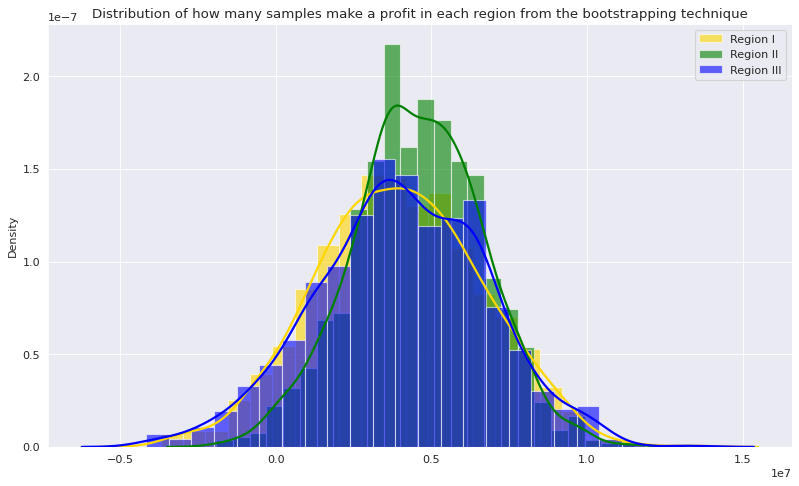

In [13]:
# profit from each region
print("\033[4mRegion I:\033[0m")
bs0 = bs_profit(target_test0, predicted_values0)
print()
print("\033[4mRegion II:\033[0m")
bs1 = bs_profit(target_test1, predicted_values1)
print()
print("\033[4mRegion III:\033[0m")
bs2 = bs_profit(target_test2, predicted_values2)

# distribution plot
kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(bs0, color='gold', label='Region I', **kwargs)
sns.distplot(bs1, color='green', label='Region II', **kwargs)
sns.distplot(bs2, color='blue', label='Region III', **kwargs)
plt.title('Distribution of how many samples make a profit in each region from the bootstrapping technique')
plt.legend();

Our distplot above show that it's highly unlikely for the developers to make a loss based on bootstrapping technique of 1k samples to find the distribution of profit , and gives us good confidence since the result looks like a nice curve that follows a normal distribution

<h3>2.Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calc it as a probability and then express as a percentage</h3>

In [14]:
#fn that takes the output of the bootstrap profits output a confidence interval, avg profit & risk of loss for a particular region
def ninetyfive_int(profits):
    ci = st.t.interval(0.95, len(profits)-1, profits.mean(), profits.sem())
    risk = len(profits[profits < 0]) / len(profits)
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    print('The average profit for this region is: ',profits.mean())
    print('The 95% confidence interval is:', ci[0], ',' ,ci[1] )
    print('The risk of losses is', risk)
    print('Confidence interval from the quantile method:', lower, ',',upper)

In [15]:
print("\033[4mRegion I:\033[0m")
ninetyfive_int(bs0)
print()
print("\033[4mRegion II:\033[0m")
ninetyfive_int(bs1)
print()
print("\033[4mRegion III:\033[0m")
ninetyfive_int(bs2)

Region I:
The average profit for this region is:  3961649.8480237117
The 95% confidence interval is: 3796203.1514797257 , 4127096.5445676977
The risk of losses is 0.069
Confidence interval from the quantile method: -1112155.4589049604 , 9097669.41553423

Region II:
The average profit for this region is:  4560451.057866608
The 95% confidence interval is: 4431472.486639005 , 4689429.62909421
The risk of losses is 0.015
Confidence interval from the quantile method: 338205.0939898458 , 8522894.538660347

Region III:
The average profit for this region is:  4044038.665683568
The 95% confidence interval is: 3874457.974712804 , 4213619.356654332
The risk of losses is 0.076
Confidence interval from the quantile method: -1633504.1339559986 , 9503595.749237997


<h3>3.Provide findings: suggest a region for development of oil wells and justify the choice</h3>

Our results from bootstrapping different from the one we go just from doing Linear Regression, This could be because region II has a better "R2" value which means that it can consistently churn out profits while region I can't

<hr><div id="general_conclusion"><h2>General conclusion:</h2></div>  

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

<b><u>INTRODUCTION</u></b>

As an analyst at the "OilyGiant" mining company , you been ask to find the bes place for a new well:

for that you made a plan with this steps:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves


- Build a model for predicting the volume of reserves in the new wells


- Pick the oil wells with the highest estimated values


- Pick the region with the highest total profit for the selected oil wells


- You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique

<hr>
<b>I - Open our data</b>

What we found:
    
Geological exploration data for the three regions are stored in files:

Three geo data sets :</b> rone(AKA geo_data_0) , rtwo(AKA geo_data_1) , rthree(AKA geo_data_2)

Number of `rows` in each one: 100k

 - `id` - data string index 
 
 
 - `CustomerId` - unique oil well identifier 
 
 
 - `f0`,`f1`,`f2` - three features of points (their specific meaning is unimportant, but the features themselves are significant)
 
  
 - `product` - volume of reserves in the oil well (thousand barrels)

 
<b><u>Conditions:</u></b>

- Only linear regression is suitable for model training (the rest are not sufficiently predictable)


- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation


- The budget for development of 200 oil wells is 100 USD million


- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels)


- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected


- The data is synthetic: contract details and well characteristics are not disclosed


<b><u>Missing Values:</u></b>

Doesn't contain any missing values 


<b><u>Duplicated:</u></b>

Doesn't contain any duplicates


<b><u>All so we found that:</u></b>

- `rone(AKA geo_data_0)`, f2 is normally distributed and has a high correlation of 0.48 to the `product`


- `rtwo(AKA geo_data_1)`, f2 is linearly correlated with `product`


- `rthree(AKA geo_data_2)`, f1, f2, and f3 are all normally distributed. Also f2 has a high correlation of 0.45 to the `product`

<hr>
<b>II - Train and test the model for each region:</b>

What we going to do in this step:

- Split the data into a training set & validation set with ratio of 75:25


- Train the model and make prediction for the validation set


- Save the predictions and correct answers for the validation set


- Print the avg vol of predicted reserves and model RMSE


Our coefficient of determination the "R2" metric (AKA R-squared) divides the Model MSE by the Mean MSE and then subtracts the obtained value from one

If the metric increases, the models quality also improves, The first & third regions have a slightly lower R-squared metric, with 0.28 and 0.21 respectively Similarly, the RMSE is related to the "R2" so the results reflect that

Avg value predicted is:

- region I is 93

- region II is 69

- region III is 95

This means that I & III regions should be preferred, with exclamation mark that the models also make more errors in those regions
<hr>
<b>III - Prepare for profit calc</b>
<hr>
Store all key values for calculations in separate variables

For now , any key value & variable have been suitably saved
<hr>
Calc the volume of reserves sufficient for developing a new well without losses, Compare the obtained value with the average volume of reserves in each region

Our following conditions: 

- Only linear regression is suitable for model training (the rest are not sufficiently predictable)

- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calc

- The budget for development of 200 oil wells is 100 million Usd

- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (vol of reserves is in thousand barrels)

- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected

<hr>
Provide the findings about the preparation for profit calculation step

Since all our calculation based on the worst case scenario , our estimate is on the safe investment, And we have two regions that pretty much have close value so this is very good news for us

<hr>
<b>IV - Write a function to calculate profit from a set of selected oil wells and model predictions:</b>
<hr>
Summarize the target volume of reserves in accordance with these predictions
<hr>
Wells with highest values for each region, Show similarity of values in region II which gives us a clue about why the "R2" was so high earlier

<hr>
Provide findings: suggest a region for oil wells' development and justify the choice, Calculate the profit for the obtained volume of reserves

Our region I , Give us a predicted profit of 33,208,260.43$ is the best place to develop. Which is not bad for a 100 million usd investment

<hr>
<b>V - Calculate risks and profit for each region:</b>

Our distplot above show that it's highly unlikely for the developers to make a loss based on bootstrapping technique of 1k samples to find the distribution of profit , and gives us good confidence since the result looks like a nice curve that follows a normal distribution

Provide findings: suggest a region for development of oil wells and justify the choice

Our results from bootstrapping different from the one we go just from doing Linear Regression, This could be because region II has a better "R2" value which means that it can consistently churn out profits while region I can't

<h2>Overall conclusion:</h2> 

In this project we check which region is the best one for our oil company to investment there time and money , we found that our quality models was evaluated and got satisfactory in our "R2"(Aka R-squared) metrics in each region we check in our model. we found that vol reserve sufficient for develop a new well without lossess is 111.11. 

Our Bootstrapping testing gave us a better insight to investment that our oil company should make, we found that all the three regions our good in profit prediction , but the one with the lower risk to loss is number II.

Therefore, we recommend that our company invest the most resources in region II of all the three we examined and start to dig the first 200 wells there.